In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

In [2]:
df.dropna(inplace=True)

In [3]:
df.index.freq='MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [5]:
#Train Test Split
train_data = df.iloc[:108] # Goes up to but not including 108
test_data = df.iloc[108:]

In [6]:
#Fitting the Model
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\Pratik Patel\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [7]:
#Evaluating Model against Test Set
# YOU CAN SAFELY IGNORE WARNINGS HERE!
# THIS WILL NOT AFFECT YOUR FORECAST, IT'S JUST SOMETHING STATSMODELS NEEDS TO UPDATE UPON NEXT RELEASE.
test_predictions = fitted_model.forecast(36).rename('HW Forecast')

In [8]:
test_predictions

1958-01-01    356.968596
1958-02-01    344.588791
1958-03-01    405.718324
1958-04-01    400.610821
1958-05-01    409.001638
1958-06-01    480.694110
1958-07-01    530.469966
1958-08-01    523.288424
1958-09-01    454.210492
1958-10-01    392.518042
1958-11-01    345.928317
1958-12-01    396.605036
1959-01-01    408.958744
1959-02-01    394.775902
1959-03-01    464.808553
1959-04-01    458.957175
1959-05-01    468.570060
1959-06-01    550.704073
1959-07-01    607.729459
1959-08-01    599.501971
1959-09-01    520.363289
1959-10-01    449.685736
1959-11-01    396.310521
1959-12-01    454.367974
1960-01-01    468.520919
1960-02-01    452.272438
1960-03-01    532.504888
1960-04-01    525.801296
1960-05-01    536.814234
1960-06-01    630.910531
1960-07-01    696.241292
1960-08-01    686.815524
1960-09-01    596.150810
1960-10-01    515.179531
1960-11-01    454.030564
1960-12-01    520.543707
Freq: MS, Name: HW Forecast, dtype: float64

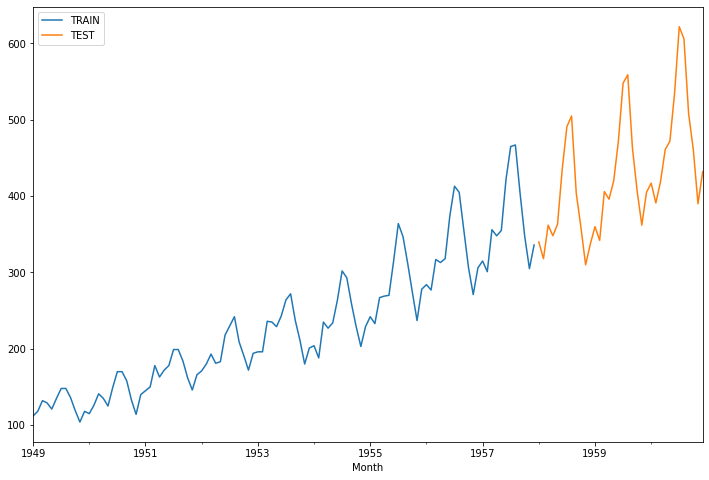

In [9]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

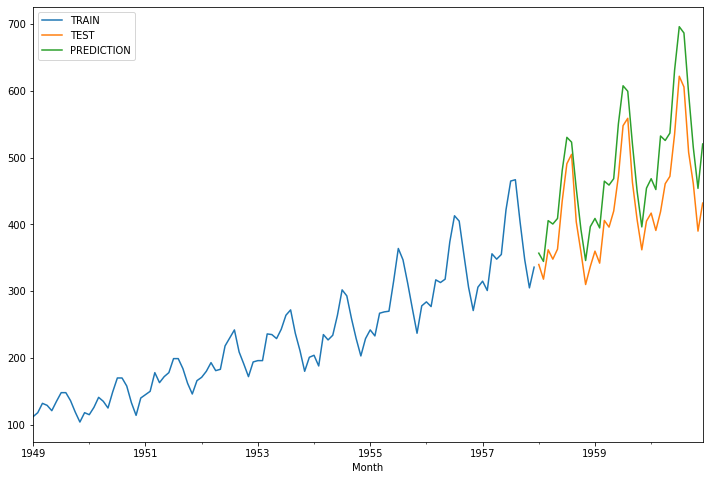

In [10]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

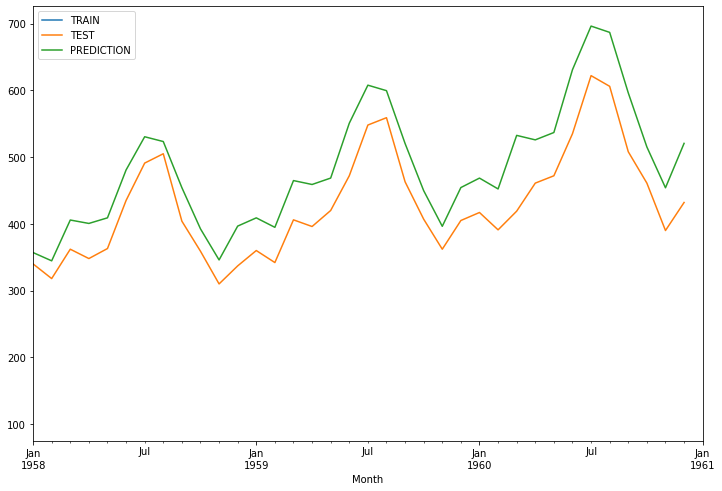

In [11]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1958-01-01','1961-01-01']);

In [14]:
#Evaluation Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [15]:
mean_absolute_error(test_data,test_predictions)

55.69782636118518

In [17]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [18]:
mean_squared_error(test_data,test_predictions)

3525.867525316523

In [20]:
np.sqrt(mean_squared_error(test_data,test_predictions))

59.37901586685757

In [21]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\Pratik Patel\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [24]:
forecast_predictions = final_model.forecast(36)

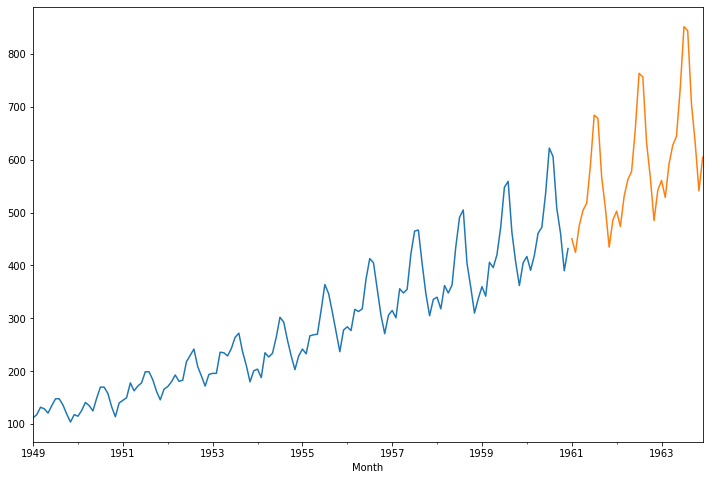

In [25]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot();

In [27]:
df2 = pd.read_csv('samples.csv',index_col=0, parse_dates=True)

In [28]:
df2

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62
...,...,...,...,...
1959-08-01,49,73,9338,58
1959-09-01,41,77,9502,38
1959-10-01,64,70,9667,42
1959-11-01,37,87,9833,62


<AxesSubplot:>

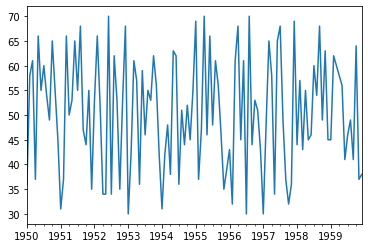

In [29]:
df2['a'].plot() # stationary data

<AxesSubplot:>

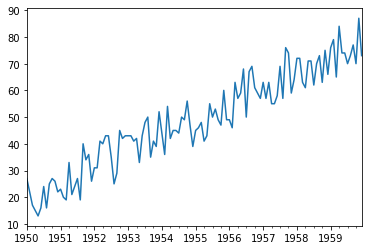

In [30]:
df2['b'].plot() # non-stationary data

In [34]:
from statsmodels.tsa.statespace.tools import diff
df2['a'] - df2['a'].shift(1)
#diff(df2['a'],k_diff=1)

1950-01-01     NaN
1950-02-01    22.0
1950-03-01     3.0
1950-04-01   -24.0
1950-05-01    29.0
              ... 
1959-08-01     3.0
1959-09-01    -8.0
1959-10-01    23.0
1959-11-01   -27.0
1959-12-01     1.0
Name: a, Length: 120, dtype: float64

<AxesSubplot:>

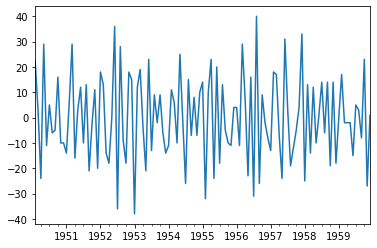

In [35]:
# after first diff now data looks like stationary without any treand and seasonality
diff(df2['a'],k_diff=1).plot()

In [ ]:
Forecasting on first order differenced data
When forecasting with first order differences, the predicted values have to be added back in to the original values in order to obtain an appropriate forecast.

Let's say that the next five forecasted values after applying some model to df['d1b'] are [7,-2,5,-1,12]. We need to perform an inverse transformation to obtain values in the scale of the original time series.

In [ ]:
# For our example we need to build a forecast series from scratch
# First determine the most recent date in the training set, to know where the forecast set should start
df2[['b']].tail(3)

In [ ]:
# Next set a DateTime index for the forecast set that extends 5 periods into the future
idx = pd.date_range('1960-01-01', periods=5, freq='MS')
z = pd.DataFrame([7,-2,5,-1,12],index=idx,columns=['Fcast'])
z

In [ ]:
The idea behind an inverse transformation is to start with the most recent value from the training set, and to add a cumulative sum of Fcast values to build the new forecast set. For this we'll use the pandas .cumsum() function which does the reverse of .diff()

In [ ]:
z['forecast']=df2['b'].iloc[-1] + z['Fcast'].cumsum()
z

In [ ]:
df2['b'].plot(figsize=(12,5), title="FORECAST").autoscale(axis='x',tight=True)

z['forecast'].plot();

In [ ]:
Second order differencing
Sometimes the first difference is not enough to attain stationarity, particularly if the trend is not linear. We can difference the already differenced values again to obtain a second order set of values.

     𝑦′′𝑡=𝑦′𝑡−𝑦′𝑡−1=(𝑦𝑡−𝑦𝑡−1)−(𝑦𝑡−1−𝑦𝑡−2)=𝑦𝑡−2𝑦𝑡−1+𝑦𝑡−2

In [ ]:
# First we'll look at the first order difference of dataset "c"
df2['d1c'] = df2['c'].diff()

df2['d1c'].plot(title="FIRST ORDER DIFFERENCE").autoscale(axis='x',tight=True);

In [ ]:
Now let's apply a second order difference to dataset "c".

In [ ]:
# We can do this from the original time series in one step
df2['d2c'] = df2['c'].diff().diff()

df2[['c','d1c','d2c']].head()

In [ ]:
df2['d2c'].plot(title="SECOND ORDER DIFFERENCE").autoscale(axis='x',tight=True);

In [ ]:
NOTE: This is different from df2['c'].diff(2), which would provide a first order difference spaced 2 lags apart.
We'll use this technique later to address seasonality.
Forecasting on second order differenced data
As before, the prediction values have to be added back in to obtain an appropriate forecast.

To invert the second order transformation and obtain forecasted values for 𝑦̂ 𝑡 we have to solve the second order equation for 𝑦𝑡:

    𝑦′′𝑡𝑦𝑡=𝑦𝑡−2𝑦𝑡−1+𝑦𝑡−2=𝑦′′𝑡+2𝑦𝑡−1−𝑦𝑡−2
Let's say that the next five forecasted values after applying some model to df['d2c'] are [7,-2,5,-1,12].

In [ ]:
# For our example we need to build a forecast series from scratch
idx = pd.date_range('1960-01-01', periods=5, freq='MS')
z = pd.DataFrame([7,-2,5,-1,12],index=idx,columns=['Fcast'])
z

In [ ]:
One way to invert a 2nd order transformation is to follow the formula above:

In [ ]:
forecast = []

# Capture the two most recent values from the training set
v2,v1 = df2['c'].iloc[-2:]

# Apply the formula
for i in z['Fcast']:
    newval = i + 2*v1 - v2
    forecast.append(newval)
    v2,v1 = v1,newval

z['forecast']=forecast
z

In [ ]:
# Add the most recent first difference from the training set to the Fcast cumulative sum
z['firstdiff'] = (df2['c'].iloc[-1]-df2['c'].iloc[-2]) + z['Fcast'].cumsum()

# Now build the forecast values from the first difference set
z['forecast'] = df2['c'].iloc[-1] + z['firstdiff'].cumsum()

z[['Fcast','firstdiff','forecast']]

In [ ]:
df2['c'].plot(figsize=(12,5), title="FORECAST").autoscale(axis='x',tight=True)

z['forecast'].plot();

In [ ]:
NOTE: statsmodels has a built-in differencing tool:
    from statsmodels.tsa.statespace.tools import diff

    df2['d1'] = diff(df2['b'],k_diff=1)


that performs the same first order differencing operation shown above. We chose not to use it here because seasonal differencing is somewhat complicated. To difference based on 12 lags, the code would be


    df2['d12'] = diff(df2['b'],k_diff=0,k_seasonal_diff=1,seasonal_periods=12)


whereas with pandas it's simply


    df2['d12'] = df2['b'].diff(12)

In [ ]:
Lagging
Also known as "backshifting", lagging notation reflects the value of  𝑦  at a prior point in time. This is a useful technique for performing regressions as we'll see in upcoming sections.

𝐿𝑦𝑡=𝑦𝑡−1𝐿2𝑦𝑡=𝑦𝑡−2 one lag shifts the data back one period two lags shift the data back two periods
 



𝑦𝑡 	6	8	3	4	9	2	5
𝑦𝑡−1 	8	3	4	9	2	5
𝑦𝑡−2 	3	4	9	2	5
Introduction to ARIMA Models
We'll investigate a variety of different forecasting models in upcoming sections, but they all stem from ARIMA.

ARIMA, or Autoregressive Integrated Moving Average is actually a combination of 3 models:

AR(p) Autoregression - a regression model that utilizes the dependent relationship between a current observation and observations over a previous period
I(d) Integration - uses differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary
MA(q) Moving Average - a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.
Moving Averages we've already seen with EWMA and the Holt-Winters Method.
Integration will apply differencing to make a time series stationary, which ARIMA requires.
Autoregression is explained in detail in the next section. Here we're going to correlate a current time series with a lagged version of the same series.
Once we understand the components, we'll investigate how to best choose the 𝑝, 𝑑 and 𝑞 values required by the model.